In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import urllib.request
from tqdm.auto import tqdm

%matplotlib inline

In [53]:
def  initial_probability_vector():
    p = np.array([0.5 for _ in np.arange(0, d)])
    return p

In [3]:
def binary_random(p):
    return int(np.random.rand() < p)

In [4]:
def random_individual(p):
    x = np.array([binary_random(p[i]) for i in np.arange(d)])
    return x

In [5]:
def random_population(p, N):
    P = np.array([random_individual(p) for _ in np.arange(N)])
    return P

In [134]:
def evaluate_individual(p):
    good_points = 0
    for point_index in range(size):
        classification = np.zeros(3)
        for rule_index in range(d):
            if p[rule_index]:
                classification[int(rules[rule_index][point_index]) - 1] += 1
        best_class = np.argmax(classification, axis = 0) + 1
        if model[point_index] == best_class:
            good_points += 1
    return good_points               

In [135]:
def evaluate_population(P):
    res = np.zeros(len(P))
    for index, p in enumerate(P):
        res[index] = evaluate_individual(p)
    return res 

In [10]:
def best_individuals(P):
    evaluated = evaluate_population(P)
    return np.where(evaluated == np.amax(evaluated))[0][0]

In [167]:
def PBIL(T, N, q1, q2, q3):
    p = initial_probability_vector()
    P = random_population(p, N)
    solutions = [[] for _ in range(T)]
    worst = np.zeros(T)
    mean = np.zeros(T)
    best = np.zeros(T)
    for i in tqdm(range(T)):
        evaluated_population = evaluate_population(P)
        best_ind_index = np.argmax(evaluated_population, axis = 0)
        best_ind = P[best_ind_index]
        solutions[i] = best_ind
        mean[i] = np.mean(evaluated_population)
        worst[i] = np.min(evaluated_population)
        best[i] = evaluated_population[best_ind_index]
        p = [p[k] * (1-q1) + q1 * best_ind[k] for k in range(d)]
    #    for k in range(d):
      #      p[k] = p[k] * (1-q1) + q1 * best_ind[k]
        p = [p[k] * (1 - q3) + binary_random(0.5) * q3 
             if np.random.rand() < q2
             else p[k]
             for k in range(d)]
    #    for k in range(d):
    #        if np.random.rand() < q2:
    #            p[k] = p[k] * (1 - q3) + binary_random(0.5) * q3
        P = random_population(p, N)
    return solutions[np.argmax(evaluate_population(solutions), axis = 0)], evaluate_population(solutions), mean, worst

In [19]:
f = open("Data\ImageExpertReduced.txt", "r")
for index, x in enumerate(f):
    words = x[2:].split('  ')
    model = np.asfarray(words,float)
    
f = open("Data\ImageRawReduced.txt", "r")
data = np.zeros((3, 9350))
for index, x in enumerate(f):
    words = x[2:].split('  ')
    data[index] = np.asfarray(words,float)

rules = np.zeros((266, 9350))
f = open("Data\ClassificationRules.txt", "r")
for index, x in enumerate(f):
    words = x[2:].split('  ')
    rules[index] = np.asfarray(words,float)
print(data.shape)  
print(model.shape)
print(rules)

(3, 9350)
(9350,)
[[1. 1. 1. ... 1. 1. 3.]
 [1. 1. 1. ... 3. 3. 3.]
 [1. 1. 1. ... 2. 2. 2.]
 ...
 [3. 3. 3. ... 3. 3. 3.]
 [3. 3. 3. ... 3. 3. 3.]
 [3. 3. 3. ... 3. 3. 3.]]


In [123]:
d = 266
size = 9350

In [68]:
print(model[:size])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [143]:
%%time
res, best, mean, worst = PBIL(50, 20, 0.1, 0.05, 0.05)


Wall time: 28min 14s


In [144]:
%%time
res2, best2, mean2, worst2 = PBIL(500, 40, 0.1, 0.05, 0.05)


Wall time: 8h 13min 18s


In [154]:
%%time
res3, best3, mean3, worst3 = PBIL(500, 40, 0.1, 0.9, 0.1)


Wall time: 10h 35min 4s


In [156]:
%%time
res4, best4, mean4, worst4 = PBIL(500, 70, 0.11, 0.06, 0.07)


Wall time: 15h 3min 33s


In [165]:
%%time
res5, best5, mean5, worst5 = PBIL(100, 40, 0.1, 0.09, 0.1)


Wall time: 2h 2min 7s


In [169]:
%%time
res6, best6, mean6, worst6 = PBIL(20, 20, 0.1, 0.1, 0.1)


Wall time: 12min 18s


In [176]:
res7, best7, mean7, worst7 = PBIL(80, 20, 0.1, 0.1, 0.1)

### Results for 500 iterations, population = 40, theta1 = 0.1, theta2 = 0.05, theta3 = 0.05

9220


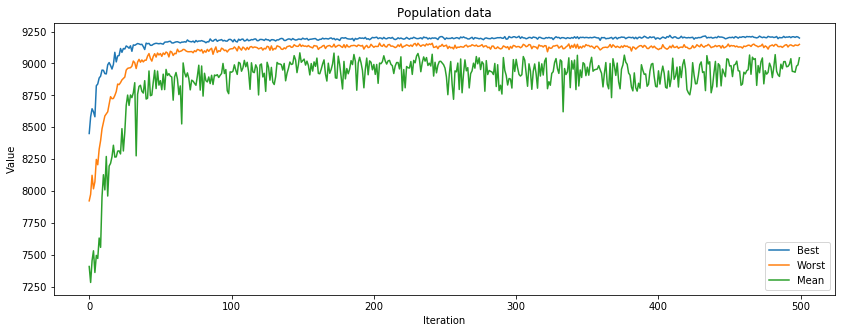

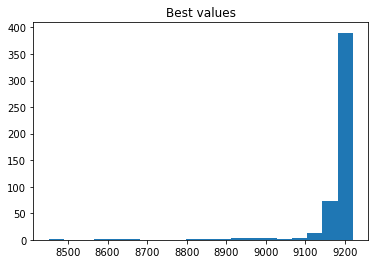

In [150]:
print(evaluate_individual(res2))
plot_results(best2, mean2, worst2)

### Results for 500 iterations, population = 40, theta1 = 0.1, theta2 = 0.9, theta3 = 0.1

9094


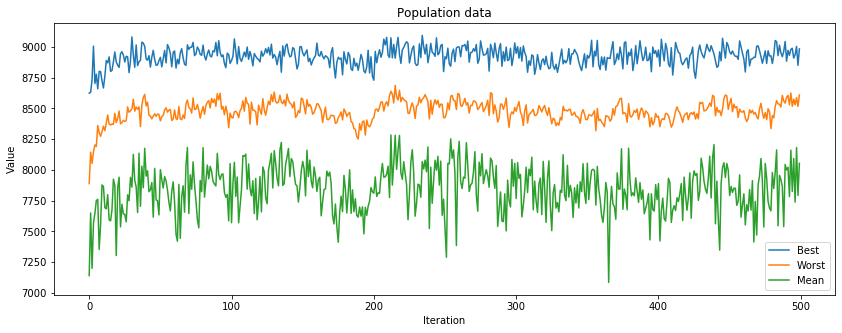

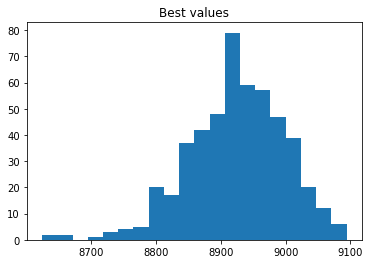

In [155]:
print(evaluate_individual(res3))
plot_results(best3, mean3, worst3)

### Results for 500 iterations, population = 40, theta1 = 0.11, theta2 = 0.06, theta3 = 0.07

9216


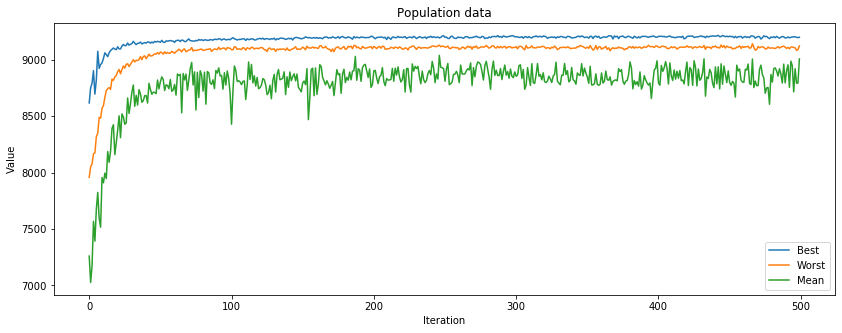

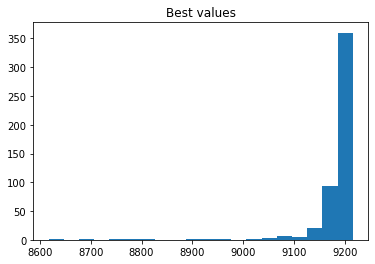

In [158]:
print(evaluate_individual(res4))
plot_results(best4, mean4, worst4)

### Results for 100 iterations, population = 40, theta1 = 0.1, theta2 = 0.09, theta3 = 0.1

9186


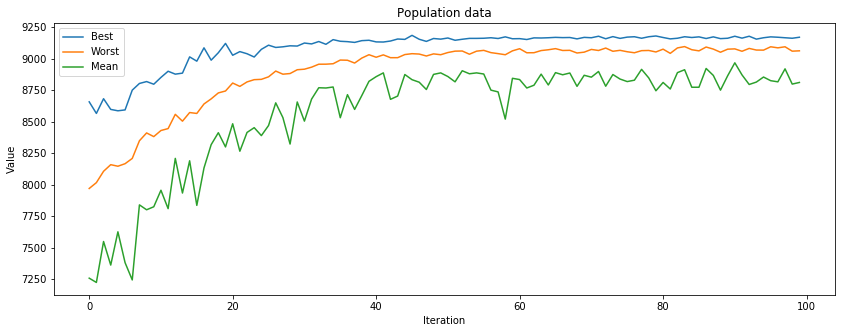

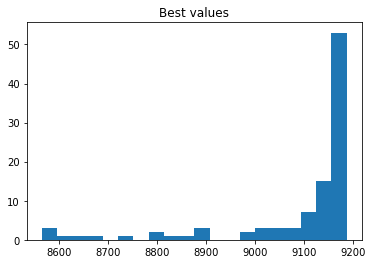

In [166]:
print(evaluate_individual(res5))
plot_results(best5, mean5, worst5)

### Results for 80 iterations, population = 20, theta1 = 0.1, theta2 = 0.1, theta3 = 01

9169


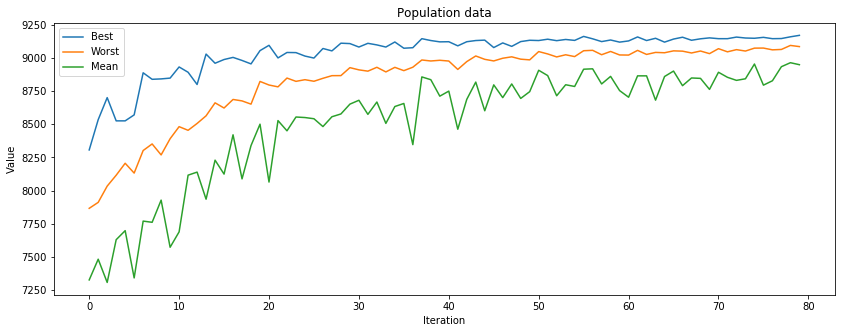

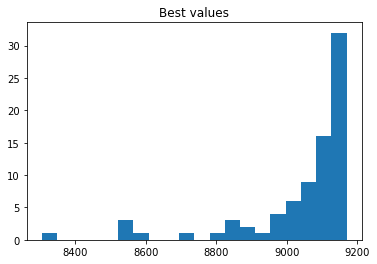

In [177]:
print(evaluate_individual(res7))
plot_results(best7, mean7, worst7)

### Histogram of results for 1000 random vectors

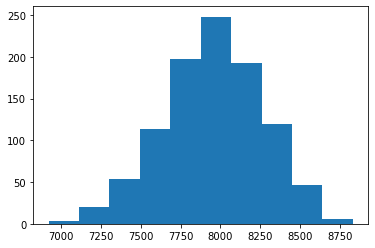

7952.828 309.96347916488486


In [175]:
iters = 1000
solutions = np.zeros(iters)
for i in range(iters):
    b = [binary_random(0.5) for _ in range(266)]
    solutions[i] = evaluate_individual(b)
    
plt.figure()
plt.hist(solutions)
plt.show()

print(solutions.mean(), solutions.std())

In [149]:
def plot_results(b, m, w):
    plt.figure(figsize=(14, 5))
    plt.title(f"Population data in each iteration")
    plt.plot(b, label = "Best")
    plt.plot(m, label = "Worst")
    plt.plot(w, label = "Mean")
    plt.xlabel("Iteration")
    plt.ylabel("Value")
    plt.legend()
    plt.show()
    
    plt.figure()
    plt.title(f"Best values")
    plt.hist(b, bins = 20)
    plt.show()
    